<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Odisha/CongressOdisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 687 (delta 18), reused 0 (delta 0), pack-reused 648
Receiving objects: 100% (687/687), 34.19 MiB | 32.42 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [5]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress odisha"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_odisha.csv',index = False)

2020-11-21 19:22:01
1330230001761923074
False
@JagiPanda @sardesairajdeep @vikramchandra @ARanganathan72 @ShekharGupta @soniandtv @sagarikaghose @aroonpurie @pratyasharath @UnSubtleDesi @rahulroushan @TimesNow @g_smita @thewire_in @AartiTikoo @chitraSD Odisha govt, the revenue depart slept until Panda Jay ji was with BJD and now all frauds are visible @sasmitpatra @AnubhavMohanty_ @CMO_Odisha : every fight has an end. Will that be Mahabharata or Ramayana style ; time will decide.. congress gone from Odisha &amp; India forever_____
SwainBighneswar
Florida, USA
Twitter for iPhone
0
70
1516
0
<--------------------------------------------------->
1
2020-11-21 18:26:15
1330215965385224193
False
@ARanganathan72 @otvnews @JagiPanda The day national media turns its focus on Odisha the corrupt regime will start collapsing rapidly. But who saves them, the opposition who rule in center.

Since 2000 to 2024 one party is ruling uninterrupted in Odisha &amp; in Center
1999-2004: BJP
2004-2014: Congr

In [6]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       86 non-null     datetime64[ns]
 1   Tweet_id   86 non-null     int64         
 2   Verified   86 non-null     bool          
 3   Tweet      86 non-null     object        
 4   User       86 non-null     object        
 5   Location   86 non-null     object        
 6   Source     86 non-null     object        
 7   Likes      86 non-null     int64         
 8   Followers  86 non-null     int64         
 9   Following  86 non-null     int64         
 10  Retweets   86 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 6.9+ KB


In [8]:
df.shape

(86, 11)

In [9]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [10]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [12]:
df['Source'].value_counts()

Twitter for Android     49
Twitter Web App         28
Twitter for iPhone       6
TweetDeck                2
Twitter Media Studio     1
Name: Source, dtype: int64

In [13]:
df['Location'].nunique()

38

In [14]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

86

In [15]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

86

In [16]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [17]:
df['Tweet'].duplicated().sum()

0

In [18]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(86, 11)

In [19]:
df['Tweet'].duplicated().sum()

0

In [20]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [21]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [22]:
df.shape

(86, 12)

In [23]:
df['Processed_Tweet']

0     @JagiPanda @sardesairajdeep @vikramchandra @AR...
1     @ARanganathan72 @otvnews @JagiPanda The day na...
2     The opposition Bharatiya Janata Party (#BJP) a...
3     @Elizatweetz @RahulGandhi Ma'am to be honest c...
4     @satya_kg @BagatiSoham @rohini_sgh @RahulGandh...
                            ...                        
81    @Soumyadipta Sibal is wrong. Congress is doing...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83    @BJP4India has been happily losing every elect...
84    #SoniaGandhi\nPlz save Odisha congress. If u p...
85    @RahulGandhi \nPlz save Odisha congress. If u ...
Name: Processed_Tweet, Length: 86, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0     @JagiPanda @sardesairajdeep @vikramchandra @AR...
1     @ARanganathan72 @otvnews @JagiPanda The day na...
2     The opposition Bharatiya Janata Party (#BJP) a...
3     @Elizatweetz @RahulGandhi Ma'am to be honest c...
4     @satya_kg @BagatiSoham @rohini_sgh @RahulGandh...
                            ...                        
81    @Soumyadipta Sibal is wrong. Congress is doing...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83    @BJP4India has been happily losing every elect...
84    #SoniaGandhi\nPlz save Odisha congress. If u p...
85    @RahulGandhi \nPlz save Odisha congress. If u ...
Name: Processed_Tweet, Length: 86, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0                                     Odisha govt, t...
1           The day national media turns its focus o...
2     The opposition Bharatiya Janata Party (#BJP) a...
3         Ma'am to be honest congress had leaders li...
4               Isn't the whole India their family g...
                            ...                        
81      Sibal is wrong. Congress is doing fine.\n\nE...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83      has been happily losing every election in Od...
84    #SoniaGandhi\nPlz save Odisha congress. If u p...
85      \nPlz save Odisha congress. If u plan to rui...
Name: Processed_Tweet, Length: 86, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0                                     Odisha govt, t...
1           The day national media turns its focus o...
2     The opposition Bharatiya Janata Party (#BJP) a...
3         Ma'am to be honest congress had leaders li...
4               Isn't the whole India their family g...
                            ...                        
81      Sibal is wrong. Congress is doing fine.\n\nE...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83      has been happily losing every election in Od...
84    #SoniaGandhi\nPlz save Odisha congress. If u p...
85      \nPlz save Odisha congress. If u plan to rui...
Name: Processed_Tweet, Length: 86, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0                                     Odisha govt, t...
1           The day national media turns its focus o...
2     The opposition Bharatiya Janata Party (BJP) an...
3         Ma'am to be honest congress had leaders li...
4               Isn't the whole India their family g...
                            ...                        
81      Sibal is wrong. Congress is doing fine.\n\nE...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83      has been happily losing every election in Od...
84    SoniaGandhi\nPlz save Odisha congress. If u pl...
85      \nPlz save Odisha congress. If u plan to rui...
Name: Processed_Tweet, Length: 86, dtype: object

In [28]:
!pip install tweet-preprocessor

In [29]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0     Odisha govt, the revenue depart slept until Pa...
1     The day national media turns its focus on Odis...
2     The opposition Bharatiya Janata Party (BJP) an...
3     Ma'am to be honest congress had leaders like G...
4     Isn't the whole India their family gopabandhu ...
                            ...                        
81    Sibal is wrong. Congress is doing fine.Electio...
82    Bihar , Odisha , UP , MP, WB , AP unless congr...
83    has been happily losing every election in Odis...
84    SoniaGandhiPlz save Odisha congress. If u plan...
85    Plz save Odisha congress. If u plan to ruin th...
Name: Processed_Tweet, Length: 86, dtype: object

In [30]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0     Odisha govt  the revenue depart slept until Pa...
1     The day national media turns its focus on Odis...
2     The opposition Bharatiya Janata Party  BJP  an...
3     Ma am to be honest congress had leaders like G...
4     Isn t the whole India their family gopabandhu ...
                            ...                        
81    Sibal is wrong  Congress is doing fine Electio...
82    Bihar   Odisha   UP   MP  WB   AP unless congr...
83    has been happily losing every election in Odis...
84    SoniaGandhiPlz save Odisha congress  If u plan...
85    Plz save Odisha congress  If u plan to ruin th...
Name: Processed_Tweet, Length: 86, dtype: object

In [31]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0     odisha govt  the revenue depart slept until pa...
1     the day national media turns its focus on odis...
2     the opposition bharatiya janata party  bjp  an...
3     ma am to be honest congress had leaders like g...
4     isn t the whole india their family gopabandhu ...
                            ...                        
81    sibal is wrong  congress is doing fine electio...
82    bihar   odisha   up   mp  wb   ap unless congr...
83    has been happily losing every election in odis...
84    soniagandhiplz save odisha congress  if u plan...
85    plz save odisha congress  if u plan to ruin th...
Name: Processed_Tweet, Length: 86, dtype: object

In [32]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'odishaassembly update  congress mla tara prasad bahinipati bangs head against speakers podium over closure of schools in odisha'

In [33]:
df['User'].value_counts()

otvnews            6
ArunRag40247264    5
OmmcomNews         4
Sambad_English     4
theargus_in        3
Congress300seat    3
SwainBighneswar    2
netajibole         2
Kalingatv          2
chandanNaik16      2
brigado_deba       2
santakar           2
harimeher007       2
ghasirampanda      1
iamjoyeetaroy      1
srspdkt            1
wasimabrar         1
BiplabSiladitya    1
odisha_ram         1
HPMohapatra        1
Anuj_utkala        1
sangramstarts      1
SOMJD              1
Satyanewshi        1
Nakshtrajyotish    1
JbSiddhartha       1
ManasCOfficial     1
Sucharita4Puri     1
DINESHRANJANRO1    1
Shruti45029314     1
LaxmidharaBari2    1
AkshayPradhanAP    1
Asishmo28323397    1
Balooo03268713     1
SatyaPr22784232    1
RamakantaShur      1
boushika7          1
FactlySanjeev      1
SujitBisoyiTOI     1
Chandra87388176    1
amlangourab        1
PhototodayNews     1
ripunbora          1
odishaRTE          1
Anmol2923          1
Outlookindia       1
RTArnabOfficial    1
jguptallb    

In [34]:
df.query('User == "rahul"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


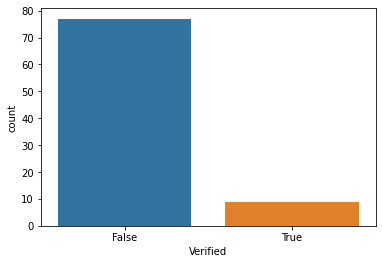

In [35]:
bar = sns.countplot(df['Verified'])

In [36]:
df['Verified'].value_counts()

False    77
True      9
Name: Verified, dtype: int64

In [37]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

otvnews         6
ripunbora       1
ians_india      1
Outlookindia    1
Name: User, dtype: int64

In [38]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 3, 16: 9, 17: 7, 18: 5, 19: 5, 20: 23, 21: 34})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

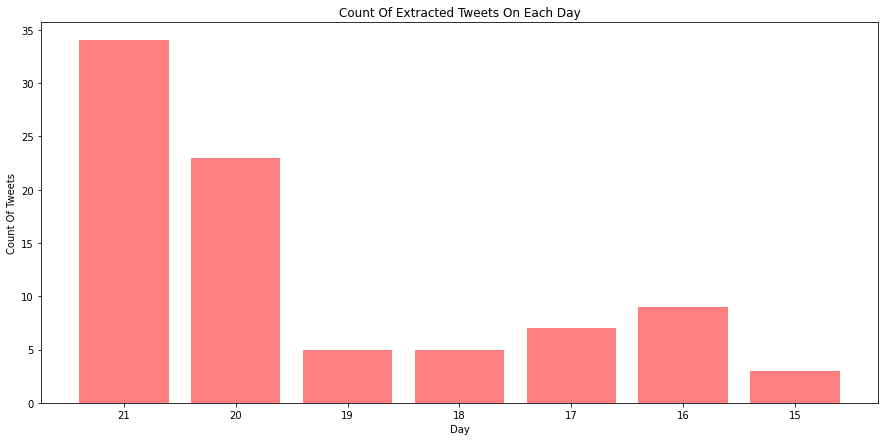

In [39]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [40]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({2: 3,
         3: 4,
         4: 3,
         5: 9,
         6: 4,
         7: 8,
         8: 2,
         9: 8,
         10: 5,
         11: 4,
         12: 6,
         13: 6,
         14: 7,
         15: 5,
         16: 6,
         17: 1,
         18: 2,
         19: 3})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

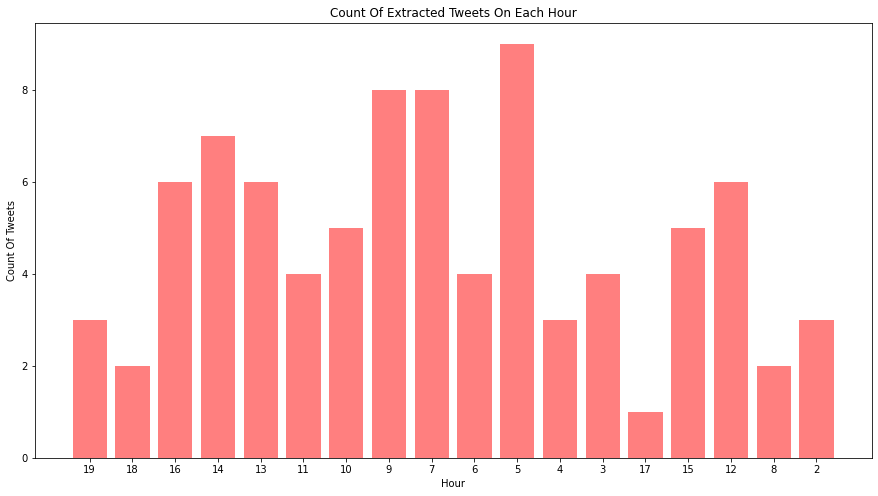

In [41]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [42]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['being', 'now', 'these', 'into', 'is', 'during', 'after', 'on', 'will', 'ain', 'through', 'the', 'he', 'at', 'if', 'out', 'not', 'just', 'in', "it's", 'but', 'here', 'between', 'shan', "won't", 'ma', 'isn', 'their', 'him', 'his', 'were', "shan't", 'whom', 'shouldn', 'down', 'further', 'only', 'below', 'all', 'having', 'any', 'm', "she's", 're', 'than', 'hadn', 'once', 'couldn', 'we', 'you', 'aren', 'so', 'd', "haven't", 't', 'for', 'are', "you'll", 'as', 'what', "needn't", 'other', "don't", "didn't", 'won', 'most', "wouldn't", 'off', 'before', "you're", 'that', 'did', 'theirs', 'your', "hadn't", 'ourselves', 'its', 'own', 'she', "mustn't", 'against', 'same', 'each', "you've", 'such', 'some', 'hasn', 'too', 'over', 'more', 'those', 'had', 'with', "weren't", 'why', "aren't", 'himself', 'who', 'doesn', 'been', 'myself', 'am', 'was', 'ours', 'yourself', 'should', 'can', 'll', 'wasn', "mightn't", 'it', "isn't", 'mustn', 'how', 'until', 'above', 'which', 'wouldn', 'there', "you'd", 'does', 

In [45]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0     odisha govt revenue depart slept panda jay ji ...
1     day national media turns focus odisha corrupt ...
2     opposition bharatiya janata party bjp congress...
3     honest congress leaders like gopabandhu dash o...
4     whole india family gopabandhu dash congress le...
                            ...                        
81    sibal wrong congress fine elections congress s...
82    bihar odisha mp wb ap unless congress fix issu...
83    happily losing every election odisha eternity ...
84    soniagandhiplz save odisha congress u plan rui...
85    plz save odisha congress u plan ruin odisha co...
Name: Processed_Tweet, Length: 86, dtype: object

In [46]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0     [odisha, govt, revenue, depart, slept, panda, ...
1     [day, national, media, turns, focus, odisha, c...
2     [opposition, bharatiya, janata, party, bjp, co...
3     [honest, congress, leaders, like, gopabandhu, ...
4     [whole, india, family, gopabandhu, dash, congr...
                            ...                        
81    [sibal, wrong, congress, fine, elections, cong...
82    [bihar, odisha, mp, wb, ap, unless, congress, ...
83    [happily, losing, every, election, odisha, ete...
84    [soniagandhiplz, save, odisha, congress, u, pl...
85    [plz, save, odisha, congress, u, plan, ruin, o...
Name: Processed_Tweet, Length: 86, dtype: object

In [47]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0     [odisha, govt, revenu, depart, slept, panda, j...
1     [day, nation, media, turn, focu, odisha, corru...
2     [opposit, bharatiya, janata, parti, bjp, congr...
3     [honest, congress, leader, like, gopabandhu, d...
4     [whole, india, famili, gopabandhu, dash, congr...
                            ...                        
81    [sibal, wrong, congress, fine, elect, congress...
82    [bihar, odisha, mp, wb, ap, unless, congress, ...
83    [happili, lose, everi, elect, odisha, etern, e...
84    [soniagandhiplz, save, odisha, congress, u, pl...
85    [plz, save, odisha, congress, u, plan, ruin, o...
Name: Processed_Tweet, Length: 86, dtype: object

In [48]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 19:22:01,1330230001761923074,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,SwainBighneswar,"Florida, USA",Twitter for iPhone,0,70,1516,0,"[odisha, govt, revenu, depart, slept, panda, j..."
1,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru..."
2,2020-11-21 16:33:28,1330187583729639425,True,The opposition Bharatiya Janata Party (#BJP) a...,ians_india,New Delhi,Twitter Web App,12,58961,45,0,"[opposit, bharatiya, janata, parti, bjp, congr..."
3,2020-11-21 14:48:04,1330161061803282433,False,@Elizatweetz @RahulGandhi Ma'am to be honest c...,brigado_deba,,Twitter Web App,4,430,619,0,"[honest, congress, leader, like, gopabandhu, d..."
4,2020-11-21 14:44:49,1330160240373997579,False,@satya_kg @BagatiSoham @rohini_sgh @RahulGandh...,brigado_deba,,Twitter Web App,0,430,619,0,"[whole, india, famili, gopabandhu, dash, congr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-11-16 05:44:17,1328212272561360896,False,@Soumyadipta Sibal is wrong. Congress is doing...,workingboxwala,POK,Twitter for Android,6,4611,256,1,"[sibal, wrong, congress, fine, elect, congress..."
82,2020-11-16 02:55:31,1328169801412272129,False,"Bihar , Odisha , UP , MP, WB , AP unless congr...",RamakantaShur,,Twitter Web App,0,523,544,0,"[bihar, odisha, unless, congress, fix, issu, d..."
83,2020-11-15 18:29:41,1328042502427791360,False,@BJP4India has been happily losing every elect...,PhoenixIndranil,Howrah,Twitter for Android,1,379,539,0,"[happili, lose, everi, elect, odisha, etern, e..."
84,2020-11-15 15:16:51,1327993974053765122,False,#SoniaGandhi\nPlz save Odisha congress. If u p...,chandanNaik16,"Badakamandara,Keonjhar",Twitter for Android,0,3,172,0,"[soniagandhiplz, save, odisha, congress, plan,..."


In [49]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

1566

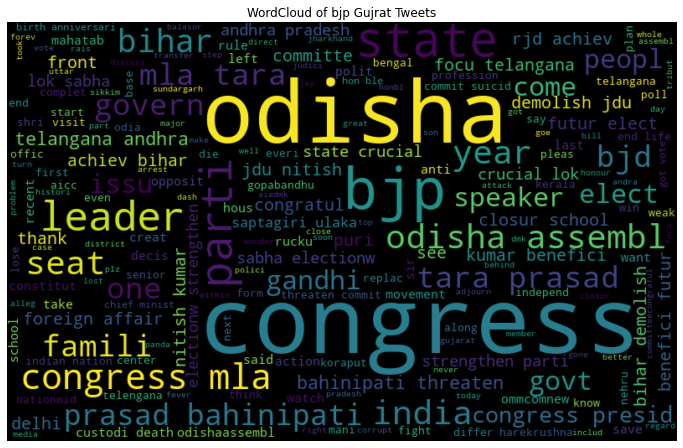

In [50]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp Gujrat Tweets")
plt.show()

In [51]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

86

In [52]:
len(text)

1566

In [53]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 36
Negative Tweets: 17
Neutral Tweets 33


In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [56]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.234,0.766,0.000,-0.7506
1,0.000,0.882,0.118,0.4939
2,0.318,0.682,0.000,-0.7906
3,0.142,0.547,0.310,0.5574
4,0.125,0.705,0.170,0.1027
...,...,...,...,...
81,0.148,0.766,0.086,-0.3182
82,0.097,0.772,0.131,-0.0258
83,0.426,0.492,0.082,-0.8885
84,0.127,0.767,0.107,-0.1531


In [57]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.234,0.766,0.000,-0.7506,Negative
1,0.000,0.882,0.118,0.4939,Positive
2,0.318,0.682,0.000,-0.7906,Negative
3,0.142,0.547,0.310,0.5574,Positive
4,0.125,0.705,0.170,0.1027,Positive


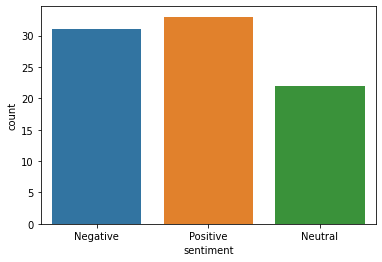

In [58]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [61]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Odisha/congress_odisha.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

145

In [62]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [64]:
word_emotion=dict()
for i in range(0,145):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,86):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

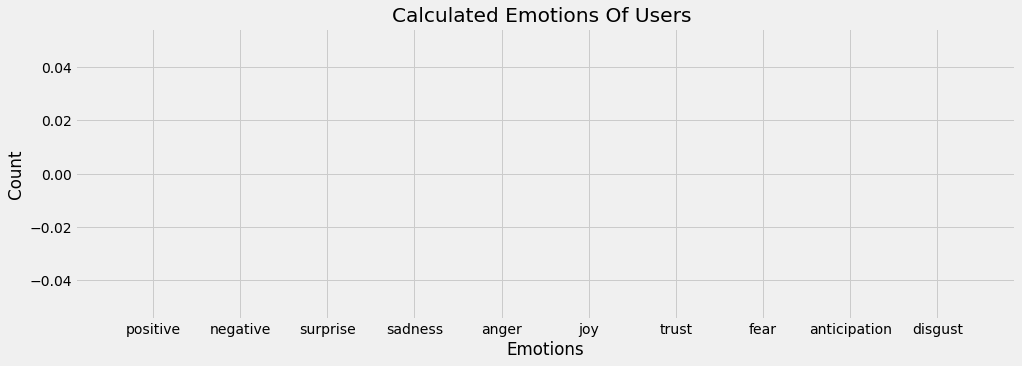

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [66]:
df.Location  = df.Location.fillna('odisha')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [67]:
df.Location = df.Location.apply(lambda x: x.replace('orissa','odisha'))
df.Location.value_counts()

                                20
Bhubaneswar, India               9
Bhubaneshwar, India              6
India                            5
Odisha                           4
Orissa, India                    2
Cuttack, India                   2
Sambalpur Odisha                 2
Florida, USA                     2
Badakamandara,Keonjhar           2
KORAPUT,Odisha ,INDIA            2
INDIA                            2
Odisha, India                    2
New Delhi, India                 2
Asureswar , Cuttack , Odisha     1
नक्षत्रतक..                      1
Subarnapur                       1
Chennai                          1
Guwahati, Assam, India           1
Hobart , 🇦🇺                      1
Bengaluru, India                 1
POK                              1
Mumbai, India                    1
Bhubaneswar                      1
କଟକ, ଓଡିଶା                       1
Phulbani-762001                  1
Cuttack, Odisha                  1
 Uttar Pradesh India             1
Bangalore           

In [68]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 19:22:01,1330230001761923074,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,SwainBighneswar,"Florida, USA",Twitter for iPhone,0,70,1516,0,"[odisha, govt, revenu, depart, slept, panda, j...",Florida
1,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru
2,2020-11-21 16:33:28,1330187583729639425,True,The opposition Bharatiya Janata Party (#BJP) a...,ians_india,New Delhi,Twitter Web App,12,58961,45,0,"[opposit, bharatiya, janata, parti, bjp, congr...",New Delhi
3,2020-11-21 14:48:04,1330161061803282433,False,@Elizatweetz @RahulGandhi Ma'am to be honest c...,brigado_deba,,Twitter Web App,4,430,619,0,"[honest, congress, leader, like, gopabandhu, d...",
4,2020-11-21 14:44:49,1330160240373997579,False,@satya_kg @BagatiSoham @rohini_sgh @RahulGandh...,brigado_deba,,Twitter Web App,0,430,619,0,"[whole, india, famili, gopabandhu, dash, congr...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-11-16 05:44:17,1328212272561360896,False,@Soumyadipta Sibal is wrong. Congress is doing...,workingboxwala,POK,Twitter for Android,6,4611,256,1,"[sibal, wrong, congress, fine, elect, congress...",POK
82,2020-11-16 02:55:31,1328169801412272129,False,"Bihar , Odisha , UP , MP, WB , AP unless congr...",RamakantaShur,,Twitter Web App,0,523,544,0,"[bihar, odisha, unless, congress, fix, issu, d...",
83,2020-11-15 18:29:41,1328042502427791360,False,@BJP4India has been happily losing every elect...,PhoenixIndranil,Howrah,Twitter for Android,1,379,539,0,"[happili, lose, everi, elect, odisha, etern, e...",Howrah
84,2020-11-15 15:16:51,1327993974053765122,False,#SoniaGandhi\nPlz save Odisha congress. If u p...,chandanNaik16,"Badakamandara,Keonjhar",Twitter for Android,0,3,172,0,"[soniagandhiplz, save, odisha, congress, plan,...",Badakamandara


In [70]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [71]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 19:22:01,1330230001761923074,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,SwainBighneswar,"Florida, USA",Twitter for iPhone,0,70,1516,0,"[odisha, govt, revenu, depart, slept, panda, j...",Florida,Negative,21
1,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru,Positive,21
2,2020-11-21 16:33:28,1330187583729639425,True,The opposition Bharatiya Janata Party (#BJP) a...,ians_india,New Delhi,Twitter Web App,12,58961,45,0,"[opposit, bharatiya, janata, parti, bjp, congr...",New Delhi,Negative,21
3,2020-11-21 14:48:04,1330161061803282433,False,@Elizatweetz @RahulGandhi Ma'am to be honest c...,brigado_deba,,Twitter Web App,4,430,619,0,"[honest, congress, leader, like, gopabandhu, d...",,Positive,21
4,2020-11-21 14:44:49,1330160240373997579,False,@satya_kg @BagatiSoham @rohini_sgh @RahulGandh...,brigado_deba,,Twitter Web App,0,430,619,0,"[whole, india, famili, gopabandhu, dash, congr...",,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


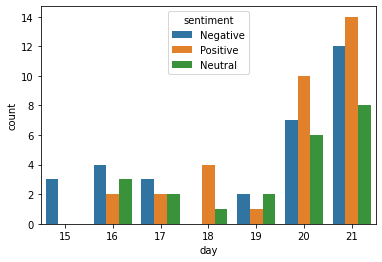

In [72]:
sns.countplot(df['day'],hue = df['sentiment'])

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [74]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 19:22:01,1330230001761923074,False,@JagiPanda @sardesairajdeep @vikramchandra @AR...,SwainBighneswar,"Florida, USA",Twitter for iPhone,0,70,1516,0,"[odisha, govt, revenu, depart, slept, panda, j...",Florida,Negative,21,0
1,2020-11-21 18:26:15,1330215965385224193,False,@ARanganathan72 @otvnews @JagiPanda The day na...,sangramstarts,"Bengaluru, India",Twitter for Android,16,285,605,0,"[day, nation, media, turn, focu, odisha, corru...",Bengaluru,Positive,21,2
2,2020-11-21 16:33:28,1330187583729639425,True,The opposition Bharatiya Janata Party (#BJP) a...,ians_india,New Delhi,Twitter Web App,12,58961,45,0,"[opposit, bharatiya, janata, parti, bjp, congr...",New Delhi,Negative,21,0
3,2020-11-21 14:48:04,1330161061803282433,False,@Elizatweetz @RahulGandhi Ma'am to be honest c...,brigado_deba,,Twitter Web App,4,430,619,0,"[honest, congress, leader, like, gopabandhu, d...",,Positive,21,2
4,2020-11-21 14:44:49,1330160240373997579,False,@satya_kg @BagatiSoham @rohini_sgh @RahulGandh...,brigado_deba,,Twitter Web App,0,430,619,0,"[whole, india, famili, gopabandhu, dash, congr...",,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2020-11-16 05:44:17,1328212272561360896,False,@Soumyadipta Sibal is wrong. Congress is doing...,workingboxwala,POK,Twitter for Android,6,4611,256,1,"[sibal, wrong, congress, fine, elect, congress...",POK,Negative,16,0
82,2020-11-16 02:55:31,1328169801412272129,False,"Bihar , Odisha , UP , MP, WB , AP unless congr...",RamakantaShur,,Twitter Web App,0,523,544,0,"[bihar, odisha, unless, congress, fix, issu, d...",,Negative,16,0
83,2020-11-15 18:29:41,1328042502427791360,False,@BJP4India has been happily losing every elect...,PhoenixIndranil,Howrah,Twitter for Android,1,379,539,0,"[happili, lose, everi, elect, odisha, etern, e...",Howrah,Negative,15,0
84,2020-11-15 15:16:51,1327993974053765122,False,#SoniaGandhi\nPlz save Odisha congress. If u p...,chandanNaik16,"Badakamandara,Keonjhar",Twitter for Android,0,3,172,0,"[soniagandhiplz, save, odisha, congress, plan,...",Badakamandara,Negative,15,0


In [75]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [77]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [78]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [79]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.3076923076923077
Precision Score:  0.3076923076923077
Recall Score:  0.3076923076923077
F1 Score:  0.3076923076923077


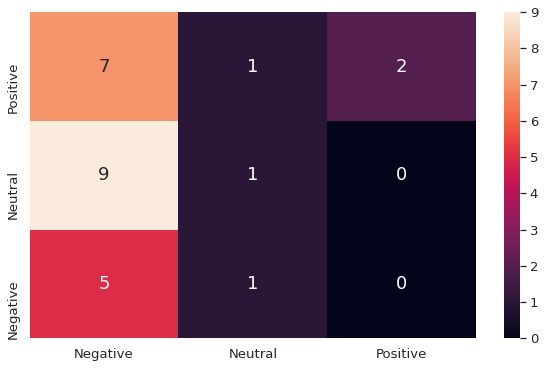

In [80]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [81]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [82]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [83]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5333333333333334
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [84]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.3076923076923077
Precision Score:  0.3076923076923077
Recall Score:  0.3076923076923077
F1 Score:  0.3076923076923077


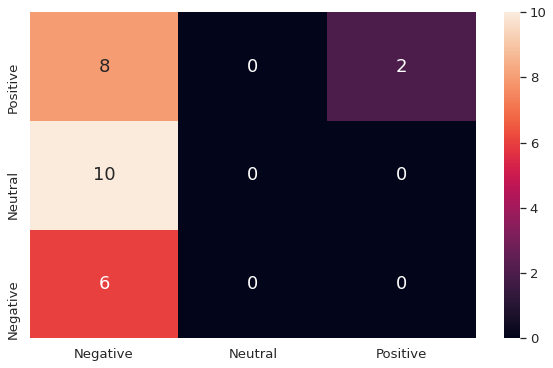

In [85]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [86]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [87]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.38461538461538464
Precision Score:  0.38461538461538464
Recall Score:  0.38461538461538464
F1 Score:  0.38461538461538464


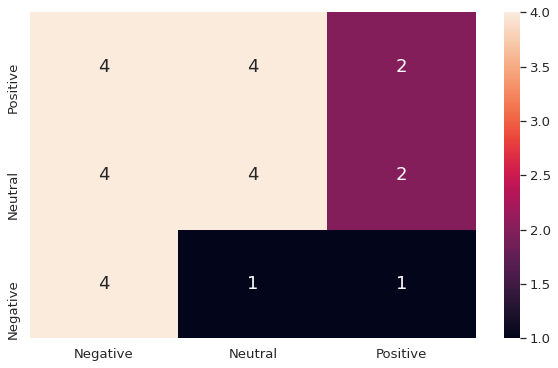

In [88]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [89]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [90]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, max_depth=10, criterion=entropy, score=0.667, total=   1.5s
[CV] n_estimators=1100, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=10, criterion=entropy, score=0.583, total=   1.6s
[CV] n_estimators=1100, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=10, criterion=entropy, score=0.583, total=   1.5s
[CV] n_estimators=1100, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=10, criterion=entropy, score=0.333, total=   1.5s
[CV] n_estimators=1100, max_depth=10, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=10, criterion=entropy, score=0.667, total=   1.5s
[CV] n_estimators=600, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=600, max_depth=6, criterion=gini, score=0.667, total=   0.8s
[CV] n_estimators=600, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=600, max_depth=6, criterion=gini, score=0.583, total=   0.8s
[CV] n_estimators=600, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.1s remaining:    0.0s


[CV]  n_estimators=600, max_depth=6, criterion=gini, score=0.583, total=   0.8s
[CV] n_estimators=600, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=600, max_depth=6, criterion=gini, score=0.333, total=   0.8s
[CV] n_estimators=600, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s remaining:    0.0s


[CV]  n_estimators=600, max_depth=6, criterion=gini, score=0.583, total=   0.8s
[CV] n_estimators=1000, max_depth=18, criterion=gini .................
[CV]  n_estimators=1000, max_depth=18, criterion=gini, score=0.667, total=   1.4s
[CV] n_estimators=1000, max_depth=18, criterion=gini .................
[CV]  n_estimators=1000, max_depth=18, criterion=gini, score=0.667, total=   1.4s
[CV] n_estimators=1000, max_depth=18, criterion=gini .................
[CV]  n_estimators=1000, max_depth=18, criterion=gini, score=0.667, total=   1.3s
[CV] n_estimators=1000, max_depth=18, criterion=gini .................
[CV]  n_estimators=1000, max_depth=18, criterion=gini, score=0.333, total=   1.3s
[CV] n_estimators=1000, max_depth=18, criterion=gini .................
[CV]  n_estimators=1000, max_depth=18, criterion=gini, score=0.667, total=   1.4s
[CV] n_estimators=800, max_depth=4, criterion=entropy ................
[CV]  n_estimators=800, max_depth=4, criterion=entropy, score=0.667, total=   1.0s
[

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.2s finished


0.6166666666666666
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.34615384615384615
Precision Score:  0.34615384615384615
Recall Score:  0.34615384615384615
F1 Score:  0.34615384615384615


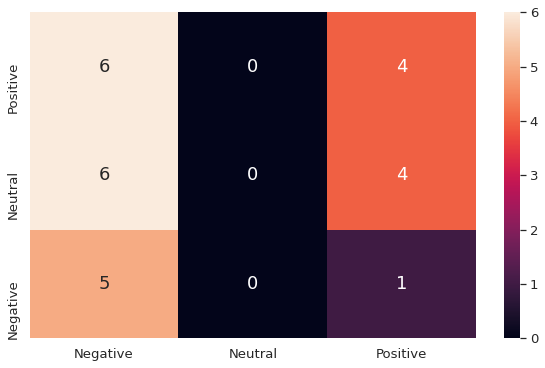

In [92]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [93]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.46153846153846156
Precision Score:  0.46153846153846156
Recall Score:  0.46153846153846156
F1 Score:  0.46153846153846156


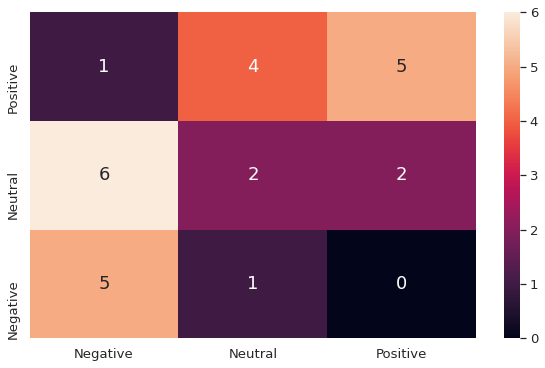

In [94]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [95]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [96]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6333333333333333
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [97]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.5
Precision Score:  0.5
Recall Score:  0.5
F1 Score:  0.5


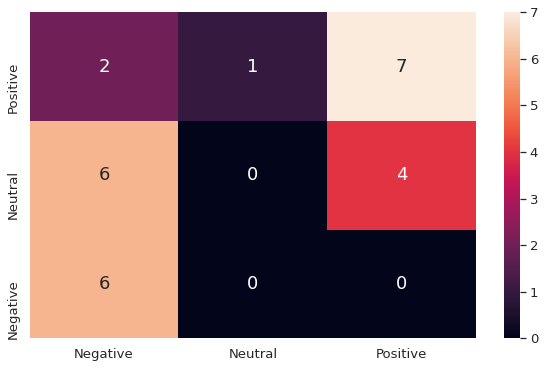

In [98]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

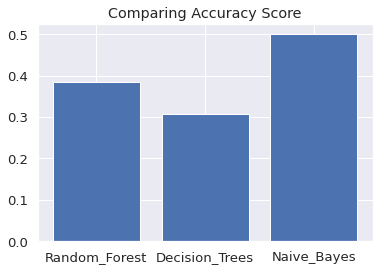

In [99]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

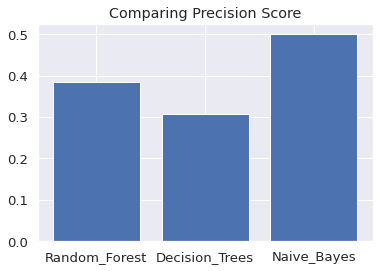

In [100]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

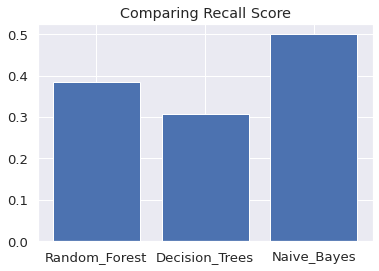

In [101]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

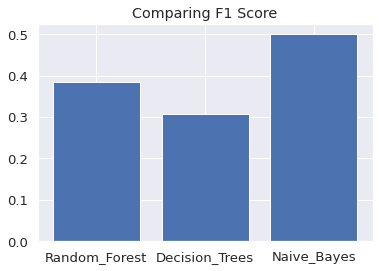

In [102]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()